In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

In [70]:
df = pd.read_csv("health_dataset.csv")

In [71]:
# Step 1: Split the data into features and target
X = df.drop(columns=['Health_Score'])
y = df['Health_Score']

In [73]:
# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Step 3: Standardize the features (optional but recommended for some models like XGBoost)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
# Step 4: Instantiate and fit the XGBoost model
model = XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [76]:
# Step 5: Evaluate the model on the training data
train_score = model.score(X_train, y_train)
print(f"Training Score: {train_score}")

Training Score: 0.9998133685578241


In [77]:
# Step 6: Evaluate the model on the test data
test_score = model.score(X_test, y_test)
print(f"Test Score: {test_score}")

Test Score: 0.8232063506634177


In [78]:
# Step 7: Perform Cross-validation to assess generalization ability
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()
print(f"Mean CV Score: {mean_cv_score}")
print(f"Standard Deviation of CV Score: {std_cv_score}")

Mean CV Score: -37.42890340886417
Standard Deviation of CV Score: 3.4780120240359196


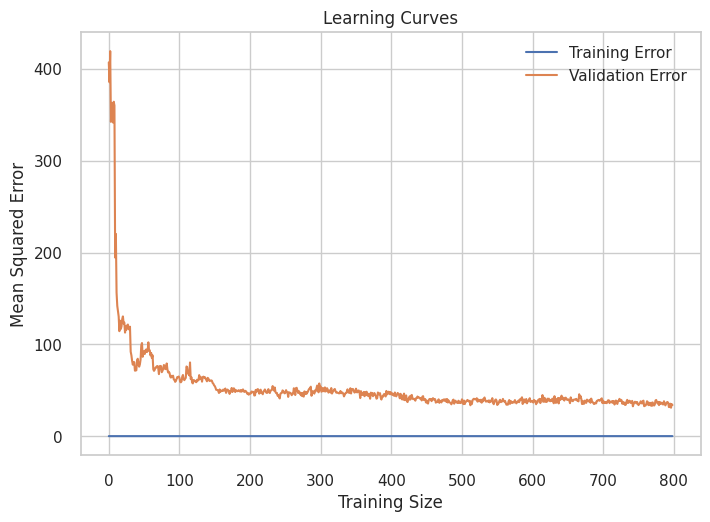

In [79]:
# Step 8: Plot learning curves to check for overfitting/underfitting
train_errors, val_errors = [], []
for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    train_errors.append(mean_squared_error(y_train[:m], model.predict(X_train[:m])))
    val_errors.append(mean_squared_error(y_test, model.predict(X_test)))

plt.plot(train_errors, label="Training Error")
plt.plot(val_errors, label="Validation Error")
plt.legend()
plt.title("Learning Curves")
plt.xlabel("Training Size")
plt.ylabel("Mean Squared Error")
plt.show()

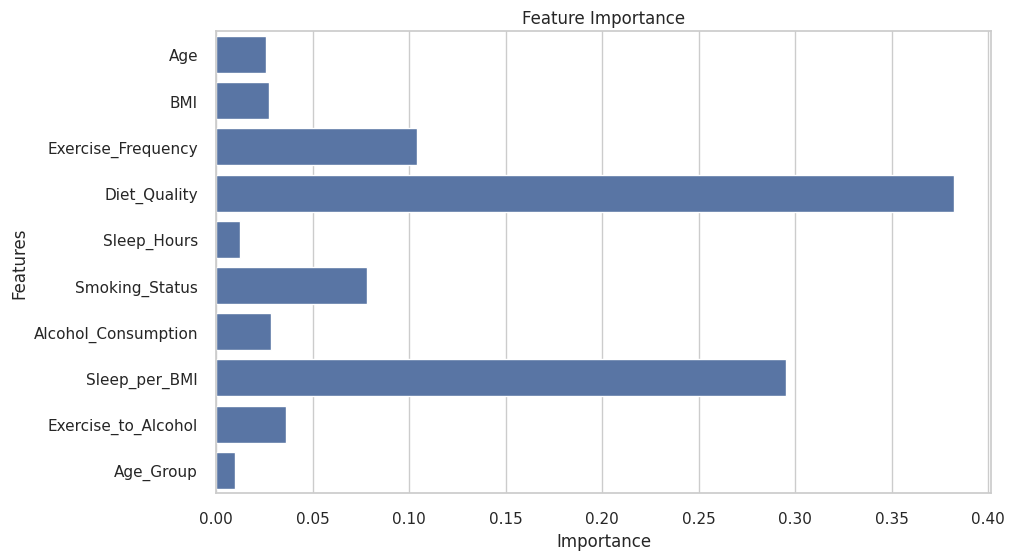

In [80]:
# Step 9: Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

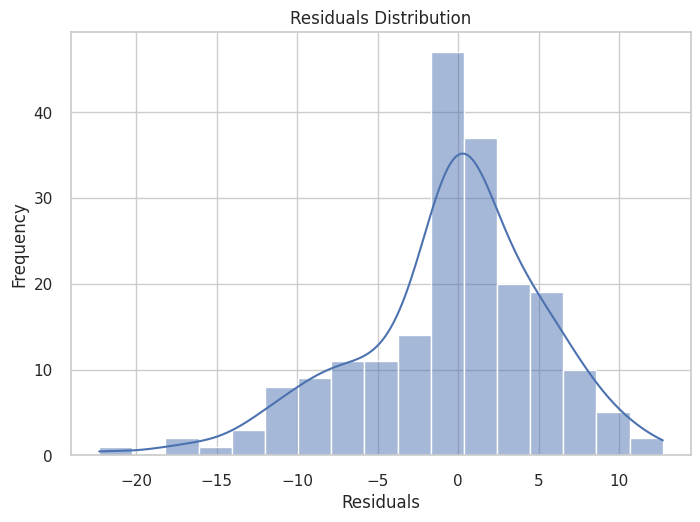

In [81]:
# Step 10: Residual analysis
predictions = model.predict(X_test)
residuals = y_test - predictions
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [83]:
# Step 12: Final model evaluation on test data
final_predictions = model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_r2 = r2_score(y_test, final_predictions)

print(f"Final Model MSE: {final_mse}")
print(f"Final Model R2: {final_r2}")

Final Model MSE: 33.8844033538734
Final Model R2: 0.8261997579125747


### ✅ **Model Evaluation Summary**
- **MSE: 33.88** → Average prediction error is about **5.82 units** (√33.88).
- **R²: 0.826** → Model explains **82.6%** of the variance — a **strong fit**.

### 🔮 **Next Steps**
1. Analyze **feature importance** (use SHAP/LIME).
2. Try **hyperparameter tuning**.
3. Test on **unseen data**.
4. Build **dashboard or API** for deployment.


In [84]:
# Step 13: Save the model and predictions for future use
import joblib
joblib.dump(model, 'xgboost_model_health_score.pkl')
pd.DataFrame({'Actual': y_test, 'Predicted': final_predictions}).to_csv('predictions.csv', index=False)